In [1]:
!pwd

/Users/mkeller/research/dbmi/vitessce/paper-figures/codex/src


In [2]:
from anndata import read_zarr
from os.path import join

In [16]:
import scanpy as sc
from muon import prot as pt

In [30]:
adata = read_zarr(join("..", "data", "raw", "reg001_expr-anndata.zarr"))
adata

AnnData object with n_obs × n_vars = 143673 × 29
    obs: 'Cell K-Means [Mean] Expression', 'Cell K-Means [Covariance] Expression', 'Cell K-Means [Total] Expression', 'Cell K-Means [Mean-All-SubRegions] Expression', 'Cell K-Means [Shape-Vectors]', 'Cell K-Means [Texture]', 'Cell K-Means [tSNE_All_Features]', 'Cell K-Means [Shape-Vectors Normalized]', 'Nuclei K-Means [Mean] Expression', 'Nuclei K-Means [Covariance] Expression', 'Nuclei K-Means [Total] Expression', 'Nuclei K-Means [Mean-All-SubRegions] Expression', 'Nuclei K-Means [Shape-Vectors]', 'Nuclei K-Means [Texture]', 'Nuclei K-Means [tSNE_All_Features]', 'Nuclei K-Means [Shape-Vectors Normalized]', 'Cell Boundaries K-Means [Mean] Expression', 'Cell Boundaries K-Means [Covariance] Expression', 'Cell Boundaries K-Means [Total] Expression', 'Cell Boundaries K-Means [Mean-All-SubRegions] Expression', 'Cell Boundaries K-Means [Shape-Vectors]', 'Cell Boundaries K-Means [Texture]', 'Cell Boundaries K-Means [tSNE_All_Features]', 'Cell B

In [38]:
# TODO: try computing new dimensionality reductions

In [31]:
pt.pp.clr(adata)

In [32]:
adata.X

array([[1.0778012 , 1.3255087 , 0.84607875, ..., 0.83737826, 0.34859788,
        1.2132169 ],
       [0.56658167, 0.11047956, 0.41013396, ..., 0.55088365, 0.        ,
        0.5301756 ],
       [0.6356346 , 0.6848332 , 0.35935307, ..., 0.32709616, 0.11496417,
        0.31761616],
       ...,
       [0.00628335, 0.        , 0.32831082, ..., 0.        , 0.18629952,
        0.        ],
       [1.0276592 , 1.3087963 , 0.9754858 , ..., 0.64042574, 0.3497912 ,
        0.826134  ],
       [1.247593  , 1.6489515 , 1.0423365 , ..., 0.9653268 , 0.01438595,
        1.135898  ]], dtype=float32)

In [33]:
sc.pp.pca(adata)

In [34]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

In [36]:
sc.tl.umap(adata)

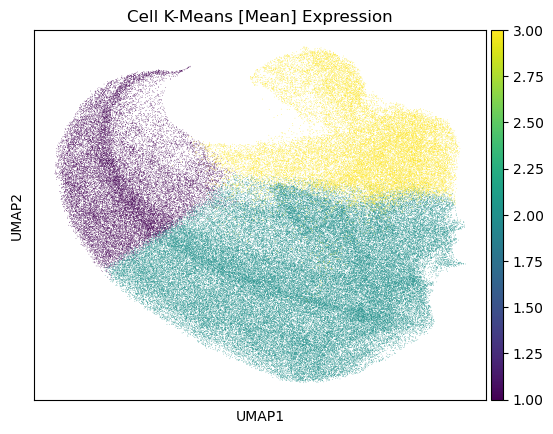

In [37]:
sc.pl.umap(adata, color=['Cell K-Means [Mean] Expression'])

In [26]:
from vitessce import (
    VitessceConfig,
    ViewType as vt,
    CoordinationType as ct,
    FileType as ft,
    AnnDataWrapper,
    MultiImageWrapper,
    OmeTiffWrapper,
    hconcat
)

In [34]:
vc = VitessceConfig(schema_version="1.0.15", name='CODEX', description='')

In [35]:
dataset = vc.add_dataset(name='CODEX').add_object(AnnDataWrapper(
    adata_path=join("..", "data", "raw", "reg001_expr-anndata.zarr"),
    obs_embedding_paths=["obsm/tsne"],
    obs_embedding_names=["t-SNE"],
    obs_locations_path="obsm/xy",
    obs_set_paths=["obs/Cell K-Means [Mean] Expression"],
    obs_set_names=["Cell K-Means [Mean] Expression"],
    obs_feature_matrix_path="X",
    coordination_values={
        "obsType": "cell",
        "featureType": "antigen",
        "featureValueType": "expression"
    }
)).add_object(MultiImageWrapper([
    OmeTiffWrapper(
        img_path=join("..", "data", "raw", "ome_tiff", "mask", "reg001_mask.ome.tif"),
        name="Segmentations",
        is_bitmask=True
    ),
    OmeTiffWrapper(
        img_path=join("..", "data", "raw", "ome_tiff", "expr", "reg001_expr.ome.tif"),
        name="Image"
    )
]))

In [36]:
layer_controller = vc.add_view(vt.LAYER_CONTROLLER, dataset=dataset)
spatial = vc.add_view(vt.SPATIAL, dataset=dataset)
scatterplot = vc.add_view(vt.SCATTERPLOT, dataset=dataset, mapping="t-SNE")
marker_list = vc.add_view(vt.FEATURE_LIST, dataset=dataset)
description = vc.add_view(vt.DESCRIPTION, dataset=dataset)
heatmap = vc.add_view(vt.HEATMAP, dataset=dataset).set_props(transpose=True)
cell_set_manager = vc.add_view(vt.OBS_SETS, dataset=dataset)


In [37]:
vc.layout(
    hconcat(layer_controller, spatial, scatterplot, marker_list)
    / hconcat(description, heatmap, cell_set_manager)
);

In [38]:
all_views = [
    layer_controller, spatial, scatterplot, marker_list,
    description, heatmap, cell_set_manager,
]
vc.link_views(
    all_views,
    [ct.FEATURE_TYPE],
    ["antigen"]
)

In [39]:
vw = vc.widget()
vw


VitessceWidget(config={'version': '1.0.15', 'name': 'CODEX', 'description': '', 'datasets': [{'uid': 'A', 'nam…